In [201]:
import Pkg

In [202]:
Pkg.add("Convex")
Pkg.add("SCS")
Pkg.add("XLSX")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("Statistics")
Pkg.add("Images")
Pkg.add("DelimitedFiles")

  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/Da

In [232]:
using Convex
using SCS
using XLSX
using DataFrames
using Plots
using CSV
using Statistics
using Images
using DelimitedFiles

---

## Линейное программирование

Решим следующую задачу линейного программирования, используя `JuMP` и `GLPK` (решатель линейного и смешанного целочисленного программирования). 

 $$
   \begin{align*}
    & \min & 12x + 20y \\
    & \;\;\text{s.t.} & 6x + 8y \geqslant 100 \\
    & & 7x + 12y \geqslant 120 \\
    & & x \geqslant 0 \\
    & & y \geqslant 0 \\
    \end{align*}
    $$

In [233]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")

  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`


In [234]:
using JuMP
using GLPK

Объект модели - это контейнер для переменных, ограничений, параметров решателя и т. д. Модели создаются с помощью функции `Model()`. Модель может быть создана с оптимизатором, присоединенным с аргументами по умолчанию, путем вызова конструктора с типом оптимизатора.

In [235]:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

Переменные задаются с помощью `@variable` (имя объекта модели, имя и привязка переменной, тип переменной). Здесь же задаются граничные условия на переменные. Если тип переменной не определен, он считается действительным.

In [236]:
@variable(model, x >= 0)
@variable(model, y >= 0)

y

Ограничения задаются с помощью `@constraint (имя объекта модели, ограничение)`.

In [237]:
@constraint(model, 6x + 8y >= 100)
@constraint(model, 7x + 12y >= 120)

7 x + 12 y ≥ 120.0

Задача задаётся аналогичным образом с помощью `@objective (имя объекта модели, Min / Max, функция для оптимизации)`.

In [238]:
@objective(model, Min, 12x + 20y)

12 x + 20 y

Чтобы решить задачу оптимизации, мы вызываем функцию оптимизации.

In [239]:
optimize!(model)

Проверяем значение цели и переменных.

In [240]:
@show value(x);
@show value(y);
@show objective_value(model);

value(x) = 14.999999999999993
value(y) = 1.2500000000000047
objective_value(model) = 205.0


---

## Векторизованные ограничения и цель

Можно добавить ограничения и цель в `JuMP`, используя векторизованную линейную алгебру.

 $$
   \begin{align*}
    & \min & c^{T} x \\
    & \;\;\text{s.t.} & Ax=b \\
    & & x \succeq 0 \\
    & & x \in \mathbb{R}^{n}
    \end{align*}
    $$

In [241]:
vector_model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [242]:
A= [ 1 1 9  5;
     3 5 0  8;
     2 0 6 13]

3×4 Array{Int64,2}:
 1  1  9   5
 3  5  0   8
 2  0  6  13

In [243]:
b = [7; 3; 5]

3-element Array{Int64,1}:
 7
 3
 5

In [244]:
c = [1; 3; 5; 2]

4-element Array{Int64,1}:
 1
 3
 5
 2

In [245]:
@variable(vector_model, x[1:4] >= 0)

4-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]
 x[4]

In [246]:
@constraint(vector_model, A * x .== b)

3-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 x[1] + x[2] + 9 x[3] + 5 x[4] = 7.0
 3 x[1] + 5 x[2] + 8 x[4] = 3.0
 2 x[1] + 6 x[3] + 13 x[4] = 5.0

In [247]:
@objective(vector_model, Min, c' * x)

x[1] + 3 x[2] + 5 x[3] + 2 x[4]

In [248]:
optimize!(vector_model)

In [249]:
@show objective_value(vector_model);

objective_value(vector_model) = 4.9230769230769225


---
## Оптимизация рациона

Нам даны ограничения на (минимальное, максимальное) количество потребляемых калорий, белков, жиров и натрия. 

Сначала мы создадим контейнер JuMP для хранения этой информации и передадим ее в качестве ограничений позже.

In [250]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")

  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`


In [251]:
using JuMP
using GLPK

In [252]:
category_data = JuMP.Containers.DenseAxisArray(
    [1800 2200;
     91   Inf;
     0    65;
     0    1779], 
    ["calories", "protein", "fat", "sodium"], 
    ["min", "max"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
    Dimension 2, ["min", "max"]
And data, a 4×2 Array{Float64,2}:
 1800.0  2200.0
   91.0    Inf
    0.0    65.0
    0.0  1779.0

In [253]:
@show category_data["calories","max"] 
@show category_data["fat","min"]
;

category_data["calories", "max"] = 2200.0
category_data["fat", "min"] = 0.0


Запишем информацию о еде, которые у нас есть.

In [254]:
foods = ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza","salad", "milk", "ice cream"]

9-element Array{String,1}:
 "hamburger"
 "chicken"
 "hot dog"
 "fries"
 "macaroni"
 "pizza"
 "salad"
 "milk"
 "ice cream"

Запишем стоимость каждого из этих товаров

In [255]:
cost = JuMP.Containers.DenseAxisArray(
    [2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59],
    foods)

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Array{Float64,1}:
 2.49
 2.89
 1.5
 1.89
 2.09
 1.99
 2.49
 0.89
 1.59

Создадим матрицу для кодирования калорий, белков, жиров и натрия, присутствующих в каждом из этих продуктов.

In [256]:
food_data = JuMP.Containers.DenseAxisArray(
    [410 24 26 730;
     420 32 10 1190;
     560 20 32 1800;
     380  4 19 270;
     320 12 10 930;
     320 15 12 820;
     320 31 12 1230;
     100  8 2.5 125;
     330  8 10 180], 
    foods, 
    ["calories", "protein", "fat", "sodium"])

@show food_data["chicken", "fat"]
@show food_data["milk", "sodium"]
;

food_data["chicken", "fat"] = 10.0
food_data["milk", "sodium"] = 125.0


Построим модель.

In [257]:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [258]:
categories = ["calories", "protein", "fat", "sodium"]

4-element Array{String,1}:
 "calories"
 "protein"
 "fat"
 "sodium"

Добавим переменные

In [259]:
@variables(model, begin
    category_data[c, "min"] <= nutrition[c = categories] <= category_data[c, "max"]
    # Сколько покупать продуктов
    buy[foods] >= 0
end)

Будем минимизировать цену

In [260]:
@objective(model, Min, sum(cost[f] * buy[f] for f in foods))

2.49 buy[hamburger] + 2.89 buy[chicken] + 1.5 buy[hot dog] + 1.89 buy[fries] + 2.09 buy[macaroni] + 1.99 buy[pizza] + 2.49 buy[salad] + 0.89 buy[milk] + 1.59 buy[ice cream]

Ограничения

In [261]:
@constraint(model, [c in categories],
    sum(food_data[f, c] * buy[f] for f in foods) == nutrition[c]
)

1-dimensional DenseAxisArray{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 410 buy[hamburger] + 420 buy[chicken] + 560 buy[hot dog] + 380 buy[fries] + 320 buy[macaroni] + 320 buy[pizza] + 320 buy[salad] + 100 buy[milk] + 330 buy[ice cream] - nutrition[calories] = 0.0
 24 buy[hamburger] + 32 buy[chicken] + 20 buy[hot dog] + 4 buy[fries] + 12 buy[macaroni] + 15 buy[pizza] + 31 buy[salad] + 8 buy[milk] + 8 buy[ice cream] - nutrition[protein] = 0.0
 26 buy[hamburger] + 10 buy[chicken] + 32 buy[hot dog] + 19 buy[fries] + 10 buy[macaroni] + 12 buy[pizza] + 12 buy[salad] + 2.5 buy[milk] + 10 buy[ice cream] - nutrition[fat] = 0.0
 730 

Решаем

In [262]:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)
is_optimal = term_status == MOI.OPTIMAL
@show JuMP.primal_status(model) == MOI.FEASIBLE_POINT
@show JuMP.objective_value(model) ≈ 11.8288 atol = 1e-4

JuMP.primal_status(model) == MOI.FEASIBLE_POINT = true
JuMP.objective_value(model) ≈ 11.8288 = false
atol = 0.0001 = 0.0001


0.0001

Чтобы увидеть решение, нужно посмотреть переменную `buy`.

In [263]:
hcat(buy.data,JuMP.value.(buy.data))

9×2 Array{GenericAffExpr{Float64,VariableRef},2}:
 buy[hamburger]  0.6045138888888888
 buy[chicken]    0
 buy[hot dog]    0
 buy[fries]      0
 buy[macaroni]   0
 buy[pizza]      0
 buy[salad]      0
 buy[milk]       6.9701388888888935
 buy[ice cream]  2.591319444444441

----

## Сколько паспортов нужно, чтобы путешествовать по миру без предварительного получения визы?

Получим данные

In [264]:
;git clone https://github.com/ilyankou/passport-index-dataset.git

Клонирование в «passport-index-dataset»…


Нам нужен файл «`passport-index-dataset/passport-index-matrix.csv`, и мы будем использовать пакет `DelimitedFiles` для его чтения.

In [265]:
passportdata = readdlm(joinpath("passport-index-dataset","passport-index-matrix.csv"),',')

200×200 Array{Any,2}:
 "Passport"                "Albania"        …    "Afghanistan"
 "Afghanistan"             "visa required"     -1
 "Albania"               -1                      "visa required"
 "Algeria"                 "visa required"       "visa required"
 "Andorra"               90                      "visa required"
 "Angola"                  "visa required"  …    "visa required"
 "Antigua and Barbuda"   90                      "visa required"
 "Argentina"             90                      "visa required"
 "Armenia"               90                      "visa required"
 "Australia"             90                      "visa required"
 "Austria"               90                 …    "visa required"
 "Azerbaijan"            90                      "visa required"
 "Bahamas"               90                      "visa required"
 ⋮                                          ⋱  
 "United Arab Emirates"  90                      "visa required"
 "United Kingdom"        90          

Вот возможные варианты:

| Значение | Расшифровка |
|---|---|
|7-360| количество безвизовых дней|
|VF| безвизовый режим|
|VOA| виза по прибытии|
|ETA| требуется eTA (electronic travel authority)|
|VR| требуется виза|
|-1| паспорт из места назначения|

Если в поле число, «VF» или «VOA», то предварительная виза не нужна.

In [266]:
cntr = passportdata[2:end,1]
vf = (x ->  typeof(x)==Int64 || x == "VF" || x == "VOA" ? 1 : 0).(passportdata[2:end,2:end]);

Зададим модель

In [267]:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

Добавим переменные, ограничения и целевую функцию.

In [268]:
@variable(model, pass[1:length(cntr)], Bin)
@constraint(model, [j=1:length(cntr)], sum( vf[i,j]*pass[i] for i in 1:length(cntr)) >= 1)
@objective(model, Min, sum(pass))

pass[1] + pass[2] + pass[3] + pass[4] + pass[5] + pass[6] + pass[7] + pass[8] + pass[9] + pass[10] + pass[11] + pass[12] + pass[13] + pass[14] + pass[15] + pass[16] + pass[17] + pass[18] + pass[19] + pass[20] + pass[21] + pass[22] + pass[23] + pass[24] + pass[25] + pass[26] + pass[27] + pass[28] + pass[29] + pass[30] + pass[31] + pass[32] + pass[33] + pass[34] + pass[35] + pass[36] + pass[37] + pass[38] + pass[39] + pass[40] + pass[41] + pass[42] + pass[43] + pass[44] + pass[45] + pass[46] + pass[47] + pass[48] + pass[49] + pass[50] + pass[51] + pass[52] + pass[53] + pass[54] + pass[55] + pass[56] + pass[57] + pass[58] + pass[59] + pass[60] + pass[61] + pass[62] + pass[63] + pass[64] + pass[65] + pass[66] + pass[67] + pass[68] + pass[69] + pass[70] + pass[71] + pass[72] + pass[73] + pass[74] + pass[75] + pass[76] + pass[77] + pass[78] + pass[79] + pass[80] + pass[81] + pass[82] + pass[83] + pass[84] + pass[85] + pass[86] + pass[87] + pass[88] + pass[89] + pass[90] + pass[91] + pass[92]

Решаем задачу

In [269]:
JuMP.optimize!(model)

In [270]:
print(JuMP.objective_value(model)," passports: ",join(cntr[findall(JuMP.value.(pass) .== 1)],", "))

63.0 passports: Afghanistan, Andorra, Argentina, Australia, Azerbaijan, Bahrain, Brunei, Cambodia, Cameroon, Canada, Chile, Colombia, Comoros, DR Congo, Djibouti, Equatorial Guinea, Eritrea, Fiji, Gabon, Georgia, Guinea, Guinea-Bissau, Hong Kong, Hungary, Indonesia, Iraq, Ireland, Israel, Jamaica, Japan, Kuwait, Laos, Liberia, Libya, Macao, Madagascar, Malaysia, Maldives, Marshall Islands, Mauritania, Mauritius, Mongolia, Mozambique, Nauru, Nepal, New Zealand, North Korea, Palestine, Papua New Guinea, Qatar, Saudi Arabia, Solomon Islands, Somalia, South Sudan, Sri Lanka, Syria, Taiwan, Timor-Leste, Togo, Turkmenistan, United States, Uruguay, Vietnam

---

## Портфельные инвестиции

Рассмотрим инвестиционную проблему. Мы посмотрим на цены на акции трех компаний и решим, как потратить 1000 долларов на эти три компании. Давайте сначала загрузим некоторые данные.

In [271]:
import Pkg
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Convex")
Pkg.add("SCS")

  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`
  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/Da

In [272]:
using XLSX
using Plots
pyplot()
using Convex
using SCS
using DataFrames

In [273]:
T = DataFrame(XLSX.readtable("data/stock_prices.xlsx","Sheet2")...)

,MSFT,FB,AAPL
,Any,Any,Any
1,101.93,137.95,148.26
2,102.8,143.8,152.29
3,107.71,150.04,156.82
4,107.17,149.01,157.76
5,102.78,165.71,166.52
6,105.67,167.33,170.41
7,108.22,162.5,170.42
8,110.97,161.89,172.97
9,112.53,162.28,174.97


`T` - это `DataFrame`, который содержит еженедельные значения цен на акции трех компаний (Microsoft, Facebook, Apple) за период с января 2019 года по март 2019 года. Посмотрим эти цены на графике.

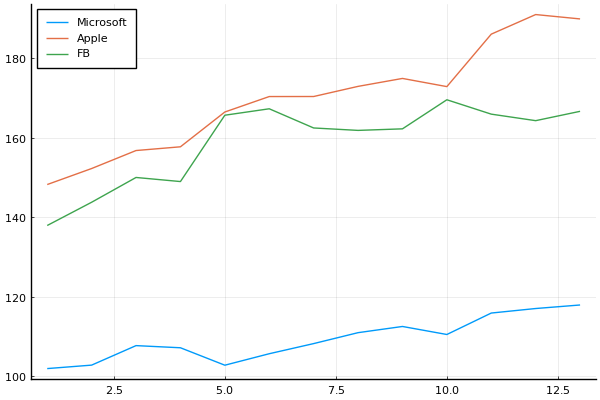

In [274]:
plot(T[!,:MSFT],label="Microsoft")
plot!(T[!,:AAPL],label="Apple")
plot!(T[!,:FB],label="FB")

In [275]:
# convert the prices to a Matrix to be used later in the optimization problem
prices_matrix = Matrix(T)

13×3 Array{Any,2}:
 101.93  137.95  148.26
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

Для вычисления еженедельной доходности мы будем использовать формулу: `R [i, t] = (price [i, t] - price [i, t-1]) / price [i, t-1]`. Это доходность акций `i` за неделю `t`.

In [276]:
M1 = prices_matrix[1:end-1,:]

12×3 Array{Any,2}:
 101.93  137.95  148.26
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05

In [277]:
M2 = prices_matrix[2:end,:]

12×3 Array{Any,2}:
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

In [278]:
R = (M2.-M1)./M1

12×3 Array{Float64,2}:
  0.00853527   0.0424067    0.027182
  0.0477626    0.0433936    0.0297459
 -0.00501346  -0.00686484   0.00599413
 -0.040963     0.112073     0.0555274
  0.0281183    0.00977611   0.0233606
  0.0241317   -0.0288651    5.8682e-5
  0.0254112   -0.00375385   0.014963
  0.0140579    0.00240904   0.0115627
 -0.0179508    0.0451072   -0.0117734
  0.0488644   -0.0213443    0.0763981
  0.00983522  -0.00988071   0.0264883
  0.00760359   0.0142996   -0.00575766

Теперь предположим, что вектор `x = [x1 x2 x3]` будет содержать общее количество денег, которые мы инвестируем в эти компании, т.е. `x1` - это то, сколько мы будем инвестировать в первую компанию (MSFT),` x2` - это то, сколько мы будем инвестировать в FB, а `x3` - это сколько мы будем инвестировать в AAPL. Возврат инвестиций будет равен `dot (r, x)`, где `r = [r1 r2 r3]` - доход от каждой из компаний.

Здесь `r` - случайная величина, и нам нужно будет смоделировать ее в терминах ожидаемых значений. И ожидаемое значение `E (dot (r, x))` будет `E [dot (mean (R, dims = 2), x)`. Если мы хотим, чтобы доходность составляла 10% или больше, то нам нужно выполнение условия `dot (r, x)> = 0,1`.

Смоделируем матрицу рисков. Матрица риска будет ковариационной матрицей рассчитанных цен доходности (`R`).

In [279]:
risk_matrix = cov(R)

3×3 Array{Float64,2}:
  0.000659383  -0.000630653  0.000139112
 -0.000630653   0.00152162   0.000192288
  0.000139112   0.000192288  0.000635503

Обратите внимание, что матрица рисков положительно определена [Positive-definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix)

$$
M{\text{ positive-definite}}\quad \iff \quad x^{\textsf {T}}Mx>0{\text{ for all }}x\in \mathbb {R} ^{n}\setminus \mathbf {0}.
$$

In [280]:
isposdef(risk_matrix)

true

In [281]:
r = mean(R,dims=1)[:]

3-element Array{Float64,1}:
 0.012532748705136572
 0.016563036855293173
 0.02114580465503291

Теперь давайте решим следующую проблему: некто дал вам 1000 долларов и сказал вам потратить их в виде инвестиций в эти три компании, чтобы вы получили возврат в размере 2\% от того, что вы потратили.

Целью будет минимизировать риск, то есть `x' * risk_matrix * x`.

Ограничения будут
- `sum (x) = 1`, мы будем вычислять процент инвестиций, а не точную сумму
- `dot (r, x) >= 0,02`
- `x [i] >= 0`

Эта задача представляет собой выпуклую задачу, и мы будем использовать для нее библиотеку `Convex.jl`.

In [282]:
x = Variable(length(r))

Variable
size: (3, 1)
sign: real
vexity: affine
id: 965…119

In [283]:
problem = minimize(x'*risk_matrix*x,[sum(x)==1;r'*x>=0.02;x.>=0])

minimize
└─ * (Convex.NotDcp; real)
   ├─ * (affine; real)
   │  ├─ adjoint (affine; real)
   │  │  └─ …
   │  └─ 3×3 Array{Float64,2}
   └─ 3-element real variable (id: 965…119)
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 965…119)
   └─ 0

status: `solve!` not called yet

┌ Warning: Expression not DCP compliant. Trying to solve non-DCP compliant problems can lead to unexpected behavior.
└ @ Convex /home/dharma/.julia/packages/Convex/v9Ehz/src/dcp.jl:25


`Convex.jl` требует, чтобы мы прошли задачу, совместимую с DCP (дисциплинированное выпуклое программирование) <http://cvxr.com/cvx/doc/dcp.html>.

Сделаем задачу совместимой с DCP.

In [284]:
problem = minimize(Convex.quadform(x,risk_matrix),[sum(x)==1;r'*x>=0.02;x.>=0])

minimize
└─ * (convex; positive)
   ├─ 1
   └─ qol_elem (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ …
      └─ [1.0]
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 965…119)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 965…119)
   └─ 0

status: `solve!` not called yet

In [285]:
solve!(problem, SCS.Optimizer)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 24, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 6, constraints m = 14
Cones:	primal zero / dual free vars: 2
	linear vars: 5
	soc vars: 7, soc blks: 2
Setup time: 2.49e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.71e+19  2.86e+19  1.00e+00 -3.40e+19  5.17e+18  5.49e+19  1.79e-05 
    98| 1.81e-11  5.95e-11  3.89e-11  4.85e-04  4.85e-04  1.51e-16  1.16e-03 
-----------------------------------------------

In [286]:
x

Variable
size: (3, 1)
sign: real
vexity: affine
id: 965…119
value: [0.0679541325834259; 0.12230859883703213; 0.8097372685335199]

In [287]:
sum(x.value)

0.9999999999539779

In [288]:
# return 
r'*x.value 

1×1 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.01999999999971038

In [289]:
x.value .* 1000

3×1 Array{Float64,2}:
  67.9541325834259
 122.30859883703212
 809.7372685335199

Вывод: надо инвестировать **67.9USD в Microsoft**, **122.3USD в Facebook**, **809.7USD в Apple**.

---

## Восстановление изображения

В этой задаче нам дается изображение, на котором были изменены некоторые пиксели. Цель состоит в том, чтобы восстановить неизвестные пиксели путем решения задачи оптимизации. 

Сначала загрузим фигуру.

In [290]:
import Pkg
Pkg.add("ImageMagick")

  Resolving package versions...
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Project.toml`
No Changes to `~/work/book/courses/de-methods/students/work/DataScience/Manifest.toml`


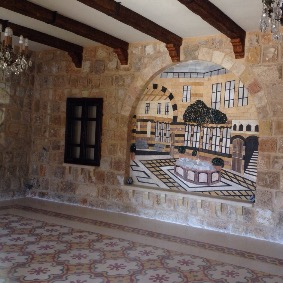

In [291]:
Kref = load("data/khiam-small.jpg")

Преобразуем изображение в оттенки серого и испортим некоторые пиксели

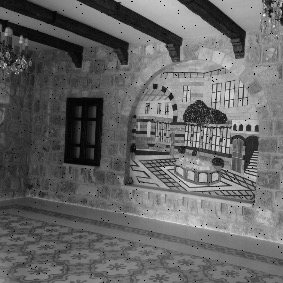

In [292]:
K = copy(Kref)
p = prod(size(K))
missingids = rand(1:p,400)
K[missingids] .= RGBX{N0f8}(0.0,0.0,0.0)
K
Gray.(K)

In [293]:
Y = Float64.(Gray.(K));

Мы будем использовать общую технику для решения этой задачи, разработанную Кандесом и Тао. Целью будет создание новой матрицы `X`, в которой мы минимизируем ядерную норму` X` (т. е. сумму сингулярных значений `X`), такую, что элементы, которые уже известны в` Y`, остаются теми же самыми в `X`. 

Мы снова будем использовать `Convex.jl` для решения этой проблемы.

In [294]:
correctids = findall(Y[:].!=0)
X = Convex.Variable(size(Y))
problem = minimize(nuclearnorm(X))
problem.constraints += X[correctids]==Y[correctids]

1-element Array{Constraint,1}:
 == constraint (affine)
├─ index (affine; real)
│  └─ 283×283 real variable (id: 474…315)
└─ 79689-element Array{Float64,1}

In [295]:
solve!(problem, SCS.Optimizer(eps=1e-3, alpha=1.5))

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 400329, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 240268, constraints m = 400046
Cones:	primal zero / dual free vars: 239585
	sd vars: 160461, sd blks: 1
Setup time: 6.91e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.04e+21  5.63e+19  1.00e+00 -1.54e+24  1.44e+22  1.15e+24  2.19e-01 
   100| 6.74e-02  3.95e-02  2.03e-05  4.39e+02  4.39e+02  9.51e-15  1.91e+01 
   200| 1.76e-02  9.80e-03  1.19e-05  4.45

norm(float.(Gray.(Kref)) - X.value) = 1.1804961259441262
norm(-(X.value)) = 124.34101475157202


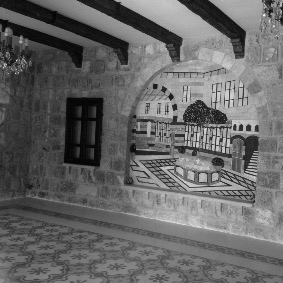

In [296]:
@show norm(float.(Gray.(Kref))-X.value)
@show norm(-X.value)
colorview(Gray, X.value)